In [1]:
from xcube.core.store import new_data_store
import os

In [2]:
team_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [3]:
team_store.list_data_ids()

['oc_cci.zarr',
 'oc_glo_cmems_300m.zarr',
 'oc_glo_cmems_4km.zarr',
 'oc_nws_cmems.zarr',
 'sen2_l2a.levels',
 'sen2_l2a_0.zarr',
 'sen2_l2a_1.zarr']

In [5]:
mlds = team_store.open_data('sen2_l2a.levels')
ds = mlds.get_dataset(4)
ds

<xarray.Dataset> Size: 2GB
Dimensions:      (time: 30, lat: 1114, lon: 1531)
Coordinates:
  * time         (time) datetime64[ns] 240B 2023-06-01 2023-06-02 ... 2023-06-30
  * lat          (lat) float64 9kB 59.6 59.6 59.6 59.59 ... 58.0 58.0 58.0 58.0
  * lon          (lon) float64 12kB 4.3 4.301 4.303 4.304 ... 6.496 6.498 6.499
    spatial_ref  int64 8B ...
Data variables:
    B02          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    B03          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    B04          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    B08          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    SCL          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
Attributes:
    time_coverage_end:    <xarray.DataArray 'time' ()> Size: 8B\narray('2023-...
    time_coverage_start:  <xarray.DataArray 'time' ()> Size: 8B\narray('2023-...

In [10]:
ds.SCL.values

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 6.        ,  6.        ,  6.        , ...,  0.        ,
          4.98046875, 15.9375    ],
        [ 6.        ,  6.        ,  6.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 6.        ,  6.        ,  6.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 6.        ,  6.        ,  6.        , ...,  

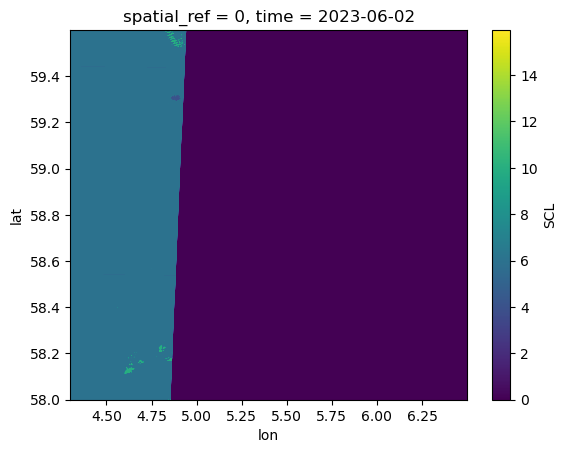

In [7]:
ds.SCL.isel(time=1).plot()

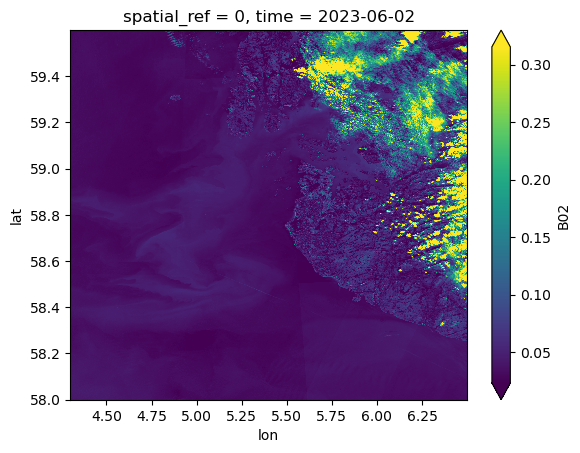

In [9]:
ds.B02.isel(time=1).plot(robust=True)